Dataset Link: https://www.kaggle.com/datasets/adityasharma01/snake-dataset-india

About Dataset
This is the image dataset of various snake species found in India. The dataset is classified into train and test previously and then to Non-Venomous and Venomous. It contains images of cobras to vipers to rat snake and green tree vine.
The size of every image is 400×400.

Code Reference: https://www.kaggle.com/code/hitzz97/emotion-detection/notebook

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


In [11]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, LeakyReLU, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [12]:
# SEED = 1000
# IMG_SIZE = 50
# BATCH_SIZE = 256

In [13]:


train_path = "/content/drive/MyDrive/ml internship feynn labs/Snake Images/test"
test_path = "/content/drive/MyDrive/ml internship feynn labs/Snake Images/train"

In [14]:
x = plt.imread("/content/drive/MyDrive/ml internship feynn labs/Snake Images/train/Venomous/king-cobra-head1.jpg")
x.shape

(400, 400, 3)

In [16]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
#Generate batches of tensor image data with real-time data augmentation.

In [17]:

train = datagen.flow_from_directory(train_path,target_size=(48,48),class_mode="sparse", seed=1, color_mode="grayscale", batch_size=128)
test = datagen.flow_from_directory(test_path,target_size=(48,48),class_mode="sparse", seed=1, color_mode="grayscale", batch_size=128)

Found 269 images belonging to 2 classes.
Found 1775 images belonging to 2 classes.


In [18]:
dir(train)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',

In [19]:
print(train.class_indices)
venom_dict = {0: "Non-Venomous", 1: "Venomous"}

{'Non Venomous': 0, 'Venomous': 1}


In [25]:
x, y = train.next()
#The next() function returns the next item in an iterator.
print(x.shape, y.shape)
train.reset()

(128, 48, 48, 1) (128,)


In [27]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(48,48,1),padding="same"),
    LeakyReLU(),
    Conv2D(32, (3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Conv2D(64,(3,3),padding="same"),
    LeakyReLU(),
    Conv2D(64,(3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(128,(3,3),padding="same"),
    LeakyReLU(),
    Conv2D(128,(3,3), padding="same"),
    LeakyReLU(),
    Conv2D(128,(3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(len(train.class_indices), activation="softmax")
])
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 48, 48, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                  

Conv2D is the layer to convolve the image into multiple images
Activation is the activation function.
MaxPooling2D is used to max pool the value from the given size matrix and same is used for the next 2 layers. then, Flatten is used to flatten the dimensions of the image obtained after convolving it.
Dense is used to make this a fully connected model and is the hidden layer.
Dropout is used to avoid overfitting on the dataset.
Dense is the output layer contains only one neuron which decide to which category image belongs.

In [28]:
net = Sequential(name='DCNN')

net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        input_shape=(48, 48, 1),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_1'
    )
)
net.add(BatchNormalization(name='batchnorm_1'))
net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_2'
    )
)
net.add(BatchNormalization(name='batchnorm_2'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
net.add(Dropout(0.4, name='dropout_1'))

net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_3'
    )
)
net.add(BatchNormalization(name='batchnorm_3'))
net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_4'
    )
)
net.add(BatchNormalization(name='batchnorm_4'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
net.add(Dropout(0.4, name='dropout_2'))

net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_5'
    )
)
net.add(BatchNormalization(name='batchnorm_5'))
net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_6'
    )
)
net.add(BatchNormalization(name='batchnorm_6'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
net.add(Dropout(0.5, name='dropout_3'))

net.add(Flatten(name='flatten'))

net.add(
    Dense(
        128,
        activation='elu',
        kernel_initializer='he_normal',
        name='dense_1'
    )
)
net.add(BatchNormalization(name='batchnorm_7'))

net.add(Dropout(0.6, name='dropout_4'))

net.add(
    Dense(
        7,
        activation='softmax',
        name='out_layer'
    )
)

net.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

net.summary()

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [34]:
model.fit(train, validation_data=test, callbacks=callbacks)

3/3 [==============================] - 8s 4s/step - loss: 1.4417 - accuracy: 0.5167 - val_loss: 0.7017 - val_accuracy: 0.4028 - lr: 1.0000e-04


In [38]:
x,y = test.next()
preds = model.predict(x)
idx = np.argmax(preds, axis = 1)
# idx.shape
print('correct prediction:', np.sum((y == idx)*1)/128)

4/4 [==============================] - 0s 5ms/step
correct prediction: 0.3828125


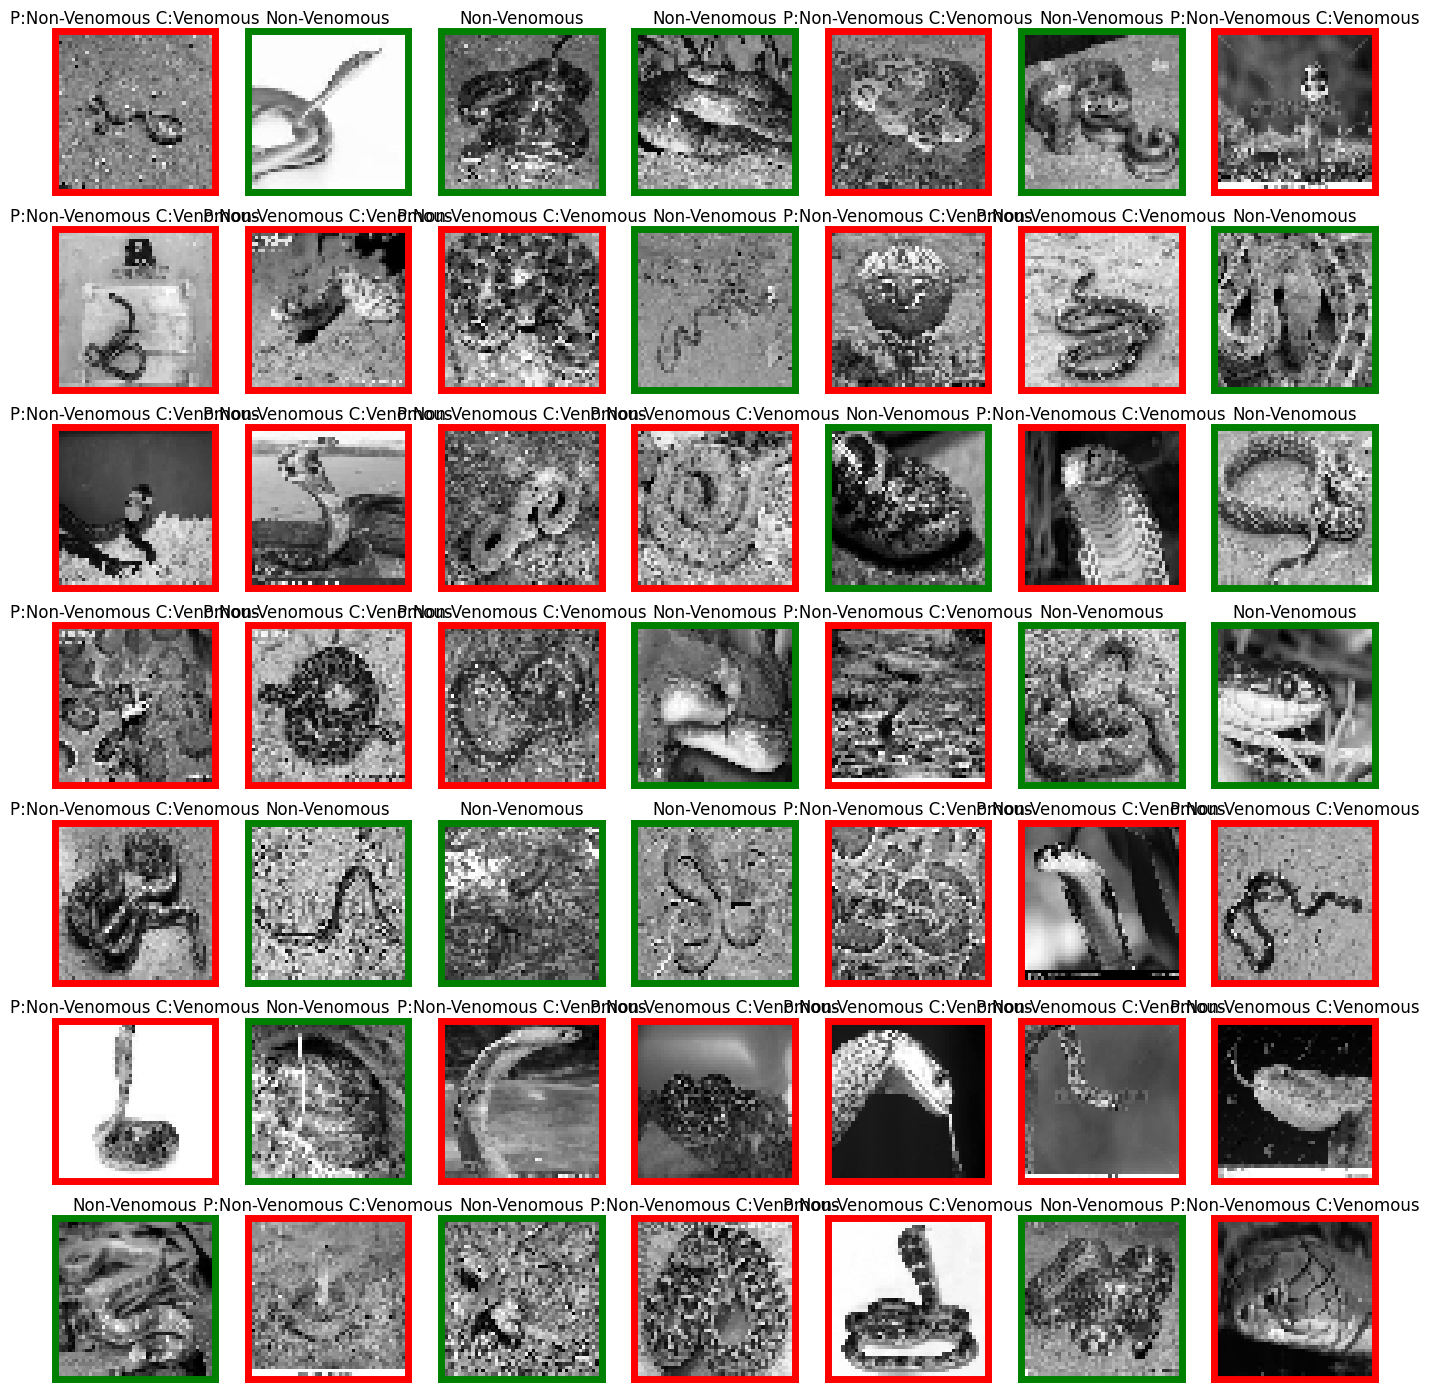

In [42]:
 fig = plt.figure(1, (14, 14))


k = 0
for j in range(49):
    px = x[j]
    k += 1
    ax = plt.subplot(7, 7, k)

    ax.imshow(px, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

    if  venom_dict[y[j]] == venom_dict[idx[j]]:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color('green')
        ax.set_title(venom_dict[idx[j]])

    else:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color('red')
        ax.set_title('P:'+venom_dict[idx[j]]+" C:"+venom_dict[y[j]])
    plt.tight_layout()